In [1]:
%matplotlib inline
from __future__ import print_function
import seaborn
import matplotlib.pyplot as plt
seaborn.set_context({"figure.figsize": (12, 6)})

/Users/standage/Projects/py3dev/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
def plot_hist_rug(data, bins=30, xlim=None, ylim=None, title=None,
                  xlab='Genomic position', ylab='Frequency'):
    """Boilerplate code for visualizations."""
    plot = seaborn.distplot(data, bins=bins, kde=False, rug=True)
    seaborn.plt.xlabel(xlab, fontsize=16)
    seaborn.plt.ylabel(ylab, fontsize=16)
    if title:
        seaborn.plt.title(title, fontsize=18)
    if xlim is not None:
        _ = plot.set(xlim=(xlim[0], xlim[1]))
    if ylim is not None:
        _ = plot.set(ylim=(ylim[0], ylim[1]))

In [3]:
def parse_milocus_lengths(infile):
    for line in infile:
        if 'type=miLocus' not in line:
            continue
        fields = line.rstrip().split('\t')
        length = int(fields[4]) - int(fields[3]) + 1
        yield length

In [4]:
def milocus_hist_orig_vs_shuf(species, xmax, ymax):
    plt.subplot(121)
    filename = 'species/%s/shuffled/%s.orig.miloci.gff3' % (species, species)
    with open(filename, 'r') as infile:
        lengths = [x for x in parse_milocus_lengths(infile)]
        plt.title('As annotated (n=%d)' % len(lengths))
        plot_hist_rug(lengths, xlab='Length (bp)',
                      xlim=(0, xmax), ylim=(0, ymax), bins=25)

    plt.subplot(122)
    filename = 'species/%s/shuffled/%s.shuffled.miloci.gff3' % (species, species)
    with open(filename, 'r') as infile:
        lengths = [x for x in parse_milocus_lengths(infile)]
        plt.title('Shuffled (n=%d)' % len(lengths))
        plot_hist_rug(lengths, xlab='Length (bp)', ylab='',
                      xlim=(0, xmax), ylim=(0, ymax), bins=25)

    plt.suptitle('%s merged iLocus Lengths' % species, fontsize=16)
    plt.show()

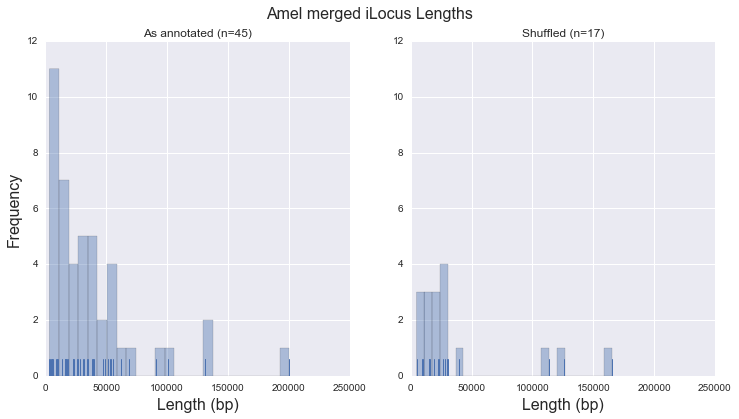

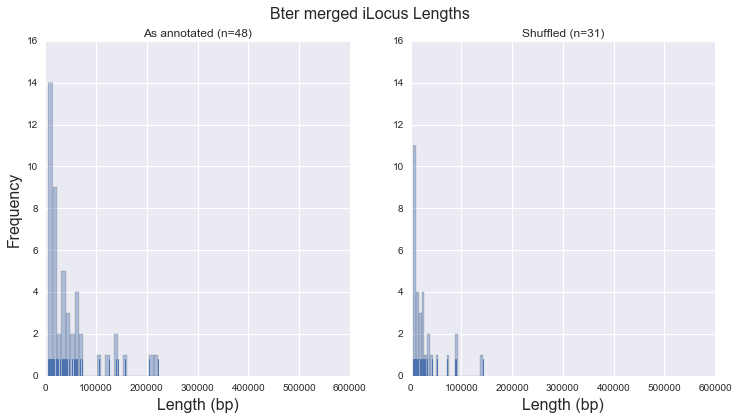

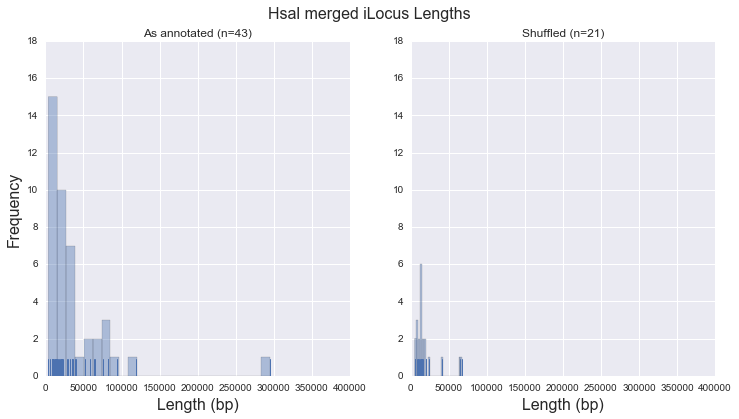

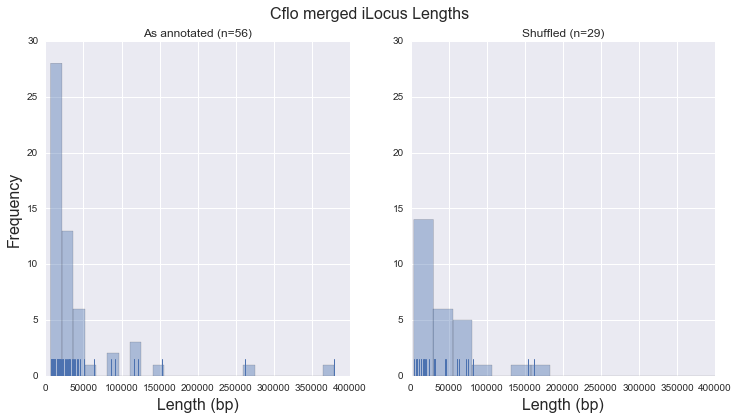

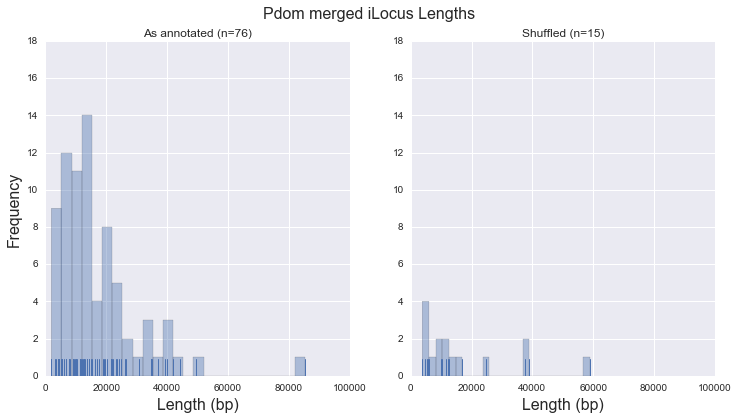

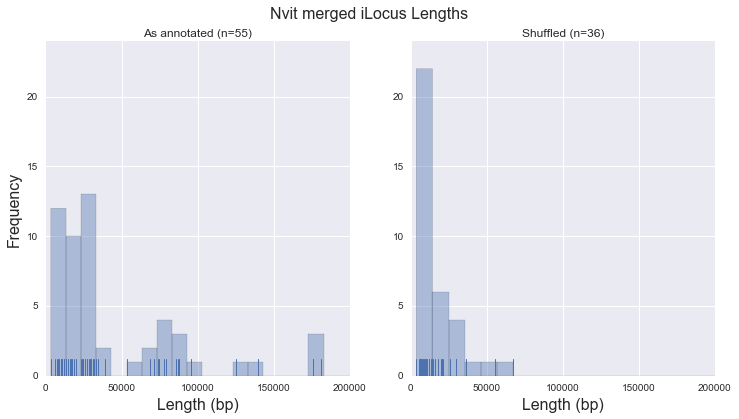

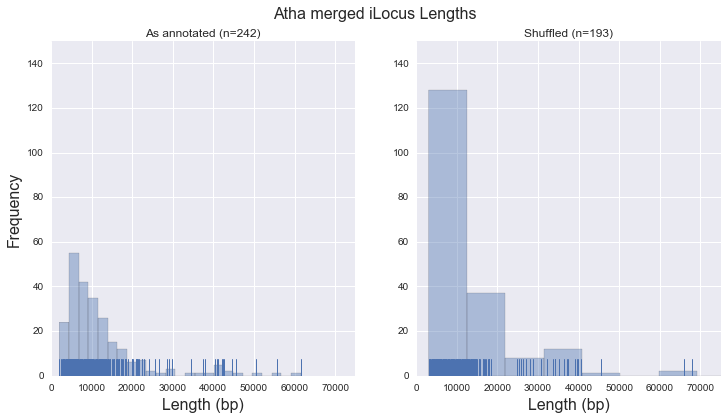

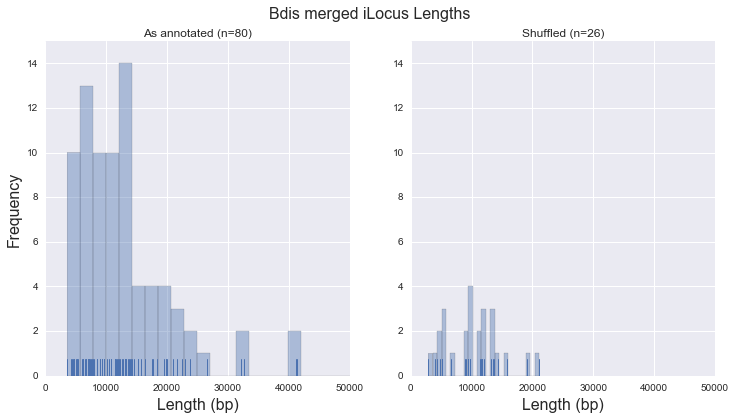

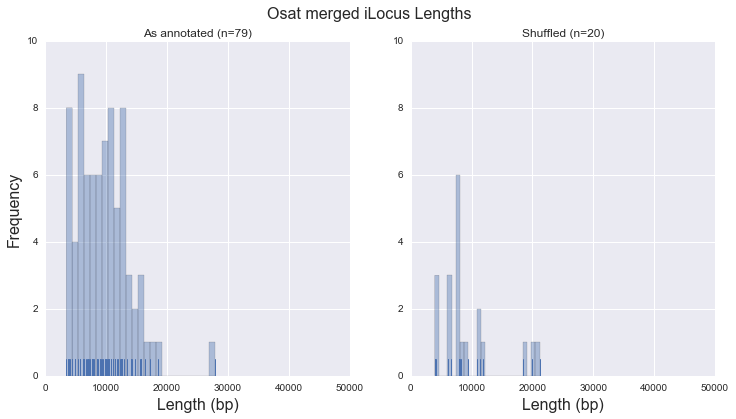

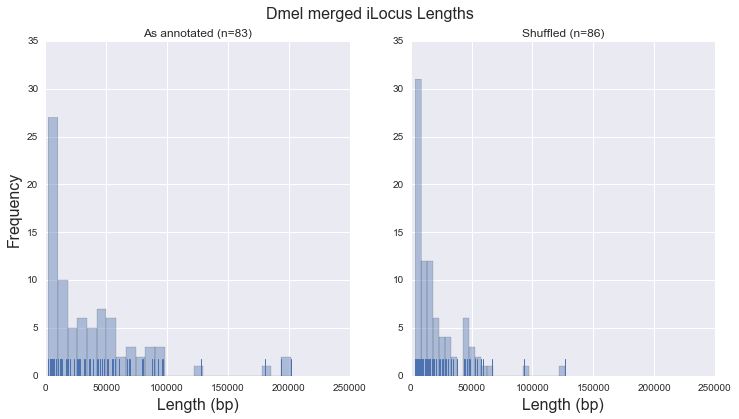

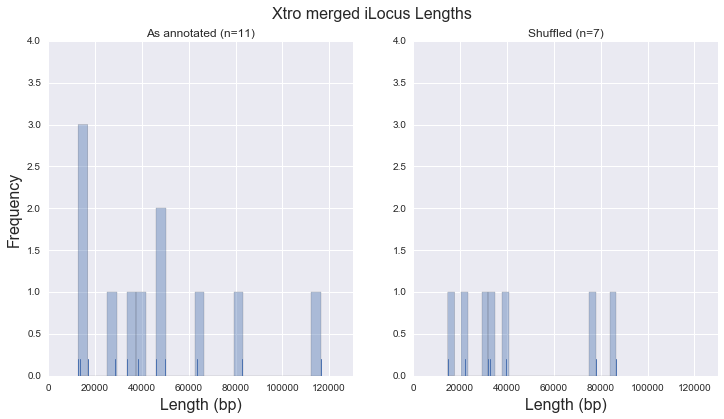

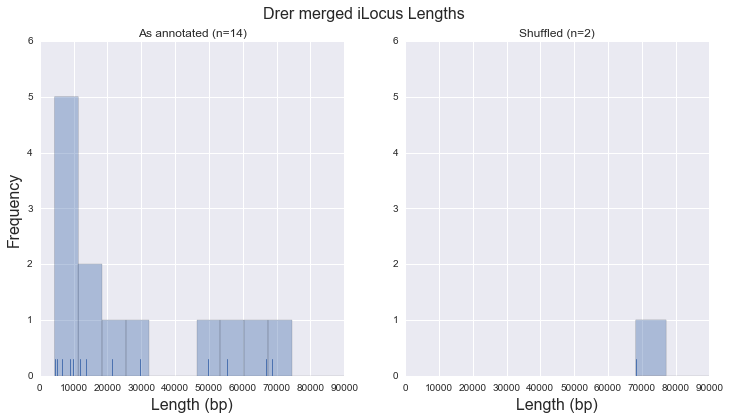

/Users/standage/Projects/py3dev/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


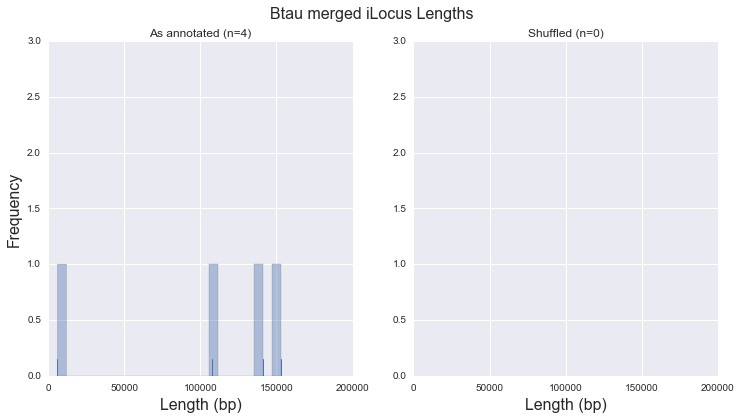

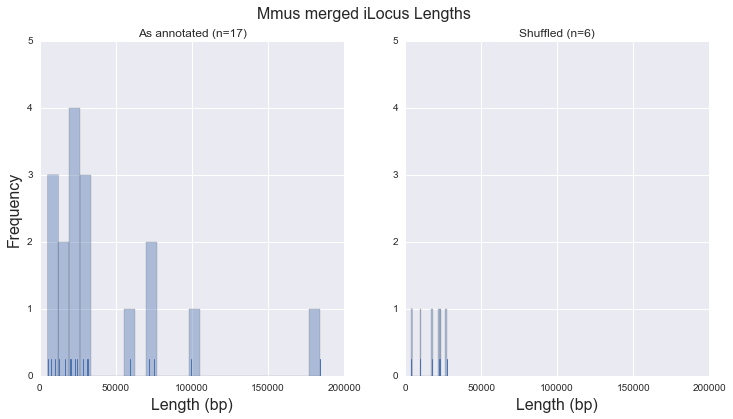

In [5]:
specdata = [('Amel', 250000, 12), ('Bter', 600000, 16),
            ('Hsal', 400000, 18), ('Cflo', 400000, 30),
            ('Pdom', 100000, 18), ('Nvit', 200000, 24),
            ('Atha', 75000, 150), ('Bdis', 50000, 15),
            ('Osat', 50000, 10), ('Dmel', 250000, 35),
            ('Xtro', 130000, 4), ('Drer', 90000, 6),
            ('Btau', 200000, 3), ('Mmus', 200000, 5)]
for species, xmax, ymax in specdata:
    milocus_hist_orig_vs_shuf(species, xmax, ymax)